<a href="https://colab.research.google.com/github/mbuitragoc/MetNumUN2023I/blob/main/Lab7/week4iterativelinalgJacobiSeidelminresGroup8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple iteration for systems of linear equations

First, generate a random diagonally dominant matrix, for testing.

In [1]:
import numpy as np
rndm = np.random.RandomState(1234)

n = 10
A = rndm.uniform(size=(n, n)) + np.diagflat([15]*n)
b = rndm.uniform(size=n)

In [2]:
A

array([[1.51915195e+01, 6.22108771e-01, 4.37727739e-01, 7.85358584e-01,
        7.79975808e-01, 2.72592605e-01, 2.76464255e-01, 8.01872178e-01,
        9.58139354e-01, 8.75932635e-01],
       [3.57817270e-01, 1.55009951e+01, 6.83462935e-01, 7.12702027e-01,
        3.70250755e-01, 5.61196186e-01, 5.03083165e-01, 1.37684496e-02,
        7.72826622e-01, 8.82641191e-01],
       [3.64885984e-01, 6.15396178e-01, 1.50753812e+01, 3.68824006e-01,
        9.33140102e-01, 6.51378143e-01, 3.97202578e-01, 7.88730143e-01,
        3.16836122e-01, 5.68098653e-01],
       [8.69127390e-01, 4.36173424e-01, 8.02147642e-01, 1.51437668e+01,
        7.04260971e-01, 7.04581308e-01, 2.18792106e-01, 9.24867629e-01,
        4.42140755e-01, 9.09315959e-01],
       [5.98092228e-02, 1.84287084e-01, 4.73552788e-02, 6.74880944e-01,
        1.55946248e+01, 5.33310163e-01, 4.33240627e-02, 5.61433080e-01,
        3.29668446e-01, 5.02966833e-01],
       [1.11894318e-01, 6.07193706e-01, 5.65944643e-01, 6.76406199e-03,
   

# I.  Jacobi iteration

Given

$$
A x = b
$$

separate the diagonal part $D$,

$$ A = D + (A - D) $$

and write

$$
x = D^{-1} (D - A) x + D^{-1} b\;.
$$

Then iterate

$$
x_{n + 1} = B x_{n} + c\;,
$$

where 

$$
B = D^{-1} (A - D) \qquad \text{and} \qquad c = D^{-1} b
$$


Let's construct the matrix and the r.h.s. for the Jacobi iteration

In [3]:
diag_1d = np.diag(A) 

B = -A.copy()
np.fill_diagonal(B, 0)

D = np.diag(diag_1d)
invD = np.diag(1./diag_1d)
BB = invD @ B 
c = invD @ b

#Sistema Ax = b se transforma en BBx = c
# BB contiene los coeficientes y c el termino constante


In [4]:
# sanity checks
from numpy.testing import assert_allclose

assert_allclose(-B + D, A)


# xx is a "ground truth" solution, compute it using a direct method
xx = np.linalg.solve(A, b)

np.testing.assert_allclose(A@xx, b)
np.testing.assert_allclose(D@xx, B@xx + b)
np.testing.assert_allclose(xx, BB@xx + c)

Check that $\| B\| \leqslant 1$:

In [5]:
np.linalg.norm(BB)

0.36436161983015336

### Do the Jacobi iteration

In [6]:
n_iter = 50

x0 = np.ones(n)
x = x0
for _ in range(n_iter):
    x = BB @ x + c

In [7]:
# Check the result:

A @ x - b

array([ 1.11022302e-16,  0.00000000e+00, -2.22044605e-16, -1.11022302e-16,
        1.11022302e-16,  0.00000000e+00, -2.42861287e-17,  0.00000000e+00,
       -2.77555756e-17,  1.11022302e-16])

### Task I.1

Collect the proof-of-concept above into a single function implementing the Jacobi iteration. This function should receive the r.h.s. matrix $A$, the l.h.s. vector `b`, and the number of iterations to perform.


The matrix $A$ in the illustration above is strongly diagonally dominant, by construction. 
What happens if the diagonal matrix elements of $A$ are made smaller? Check the convergence of the Jacobi iteration, and check the value of the norm of $B$.

(20% of the total grade)


In [23]:
# ... ENTER YOUR CODE HERE ...
def jacobi_iteration(A, b, n_iter):
    # Extract the diagonal of A
    diag_1d = np.diag(A)

    # Create B a copy of the inverse without diagonal and D a copy of the diagonal
    B = -A.copy()
    np.fill_diagonal(B, 0)
    D = np.diag(diag_1d)

    # Compute invD, BB, and c
    invD = np.diag(1./diag_1d)
    BB = invD @ B 
    c = invD @ b

    # Perform the Jacobi iteration
    x = np.ones(A.shape[0])
    for _ in range(n_iter):
        x = BB @ x + c

    return x, BB


Check for convergence and value of the norm

In [24]:
import numpy as np

# Set the random seed for reproducibility
rndm = np.random.RandomState(1234)

# Size of the matrices
n = 10

# Generate a diagonally dominant matrix
A_dd = rndm.uniform(size=(n, n)) + np.diagflat([15]*n)
b_dd = rndm.uniform(size=n)

# Generate a non-diagonally dominant matrix
A_ndd = rndm.uniform(size=(n, n))
b_ndd = rndm.uniform(size=n)

# Number of iterations
n_iter = 50

# Perform the Jacobi iteration for the diagonally dominant matrix
x_dd, BB_dd = jacobi_iteration(A_dd, b_dd, n_iter)
# Check the convergence
xx_dd = np.linalg.solve(A_dd, b_dd)
print("Convergence for the diagonally dominant matrix:", np.allclose(x_dd, xx_dd))
# Check the norm of BB
print("Norm of BB for the diagonally dominant matrix:", np.linalg.norm(BB_dd))


# Perform the Jacobi iteration for the non-diagonally dominant matrix
x_ndd, BB_ndd = jacobi_iteration(A_ndd, b_ndd, n_iter)
# Check the convergence
xx_ndd = np.linalg.solve(A_ndd, b_ndd)
print("Convergence for the non-diagonally dominant matrix:", np.allclose(x_ndd, xx_ndd))
# Check the norm of BB
print("Norm of BB for the non-diagonally dominant matrix:", np.linalg.norm(BB_ndd))


Convergence for the diagonally dominant matrix: True
Norm of BB for the diagonally dominant matrix: 0.36436161983015336
Convergence for the non-diagonally dominant matrix: False
Norm of BB for the non-diagonally dominant matrix: 11.66968152533123


# II. Seidel's iteration.

##### Task II.1

Implement the Seidel's iteration. 

Test it on a random matrix. Study the convergence of iterations, relate to the norm of the iteration matrix.

(30% of the total grade)

In [26]:
def gauss_seidel(A, b, tolerance=1e-10, max_iterations=10000):
    
    x = np.zeros_like(b, dtype=np.double)
    
    # Create a copy of A and b to avoid modifying the original matrix and vector
    A_copy = A.copy()
    b_copy = b.copy()
    
    # Initialize lists to store the history of the approximations and the residuals
    x_history = [x.copy()]
    residual_history = [np.linalg.norm(A @ x - b)]
    
    # Iterate
    for k in range(max_iterations):
        
        x_old  = x.copy()
        
        # Loop over rows
        for i in range(A_copy.shape[0]):

            #x(i) <- b(i) - ith fila de A producto punto x actual
            x[i] = (b_copy[i] - np.dot(A_copy[i,:i], x[:i]) - np.dot(A_copy[i,(i+1):], x_old[(i+1):])) / A_copy[i ,i]
            
        # Store the current approximation and the current residual
        x_history.append(x.copy())
        residual_history.append(np.linalg.norm(A @ x - b))
            
        # Stop condition 
        # ord=np.inf gives us the infinite norm af the vector or the maximum absolute value
        if np.linalg.norm(x - x_old, ord=np.inf) / np.linalg.norm(x, ord=np.inf) < tolerance:
            break
            
    return x, x_history, residual_history


Test on a random Matrix

In [30]:
import numpy as np

# Set the random seed for reproducibility
rndm = np.random.RandomState(1234)

# Size of the matrix
n = 10

# Generate a diagonally dominant matrix
A = rndm.uniform(size=(n, n)) + np.diagflat([15]*n)
b = rndm.uniform(size=n)

# Perform the Gauss-Seidel iteration
x_gs, x_history, residual_history = gauss_seidel(A, b, tolerance=1e-10, max_iterations=10000)

# Check the convergence
xx = np.linalg.solve(A, b)
print("Convergence for the Gauss-Seidel method:", np.allclose(x_gs, xx))

# Compute the iteration matrix for the Gauss-Seidel method
# Lower triangular matrix 
L = np.tril(A)
# Uper triangular matrix, shifted one up so the original diagonal is not included
U = np.triu(A, 1)
# Inverse of Lower triangular @ Upper triangular
G_gs = np.linalg.inv(L) @ U

# Compute the norm of the iteration matrix
norm_G_gs = np.linalg.norm(G_gs)
print("Norm of the iteration matrix for the Gauss-Seidel method:", norm_G_gs)


Convergence for the Gauss-Seidel method: True
Norm of the iteration matrix for the Gauss-Seidel method: 0.26515087068954285


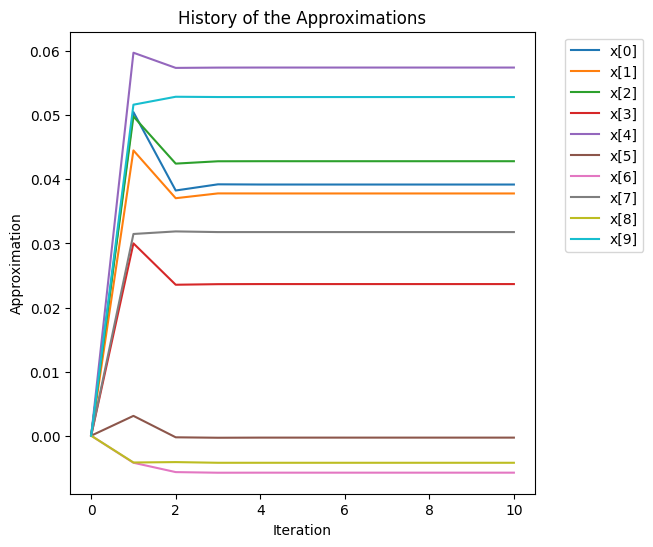

In [31]:
import matplotlib.pyplot as plt

# Convert the history of the approximations to a 2D array
x_history = np.array(x_history).T

# Plot the history of the approximations
plt.figure(figsize=(6, 6))
for i in range(A.shape[0]):
    plt.plot(x_history[i], label=f'x[{i}]')
plt.xlabel('Iteration')
plt.ylabel('Approximation')
plt.title('History of the Approximations')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


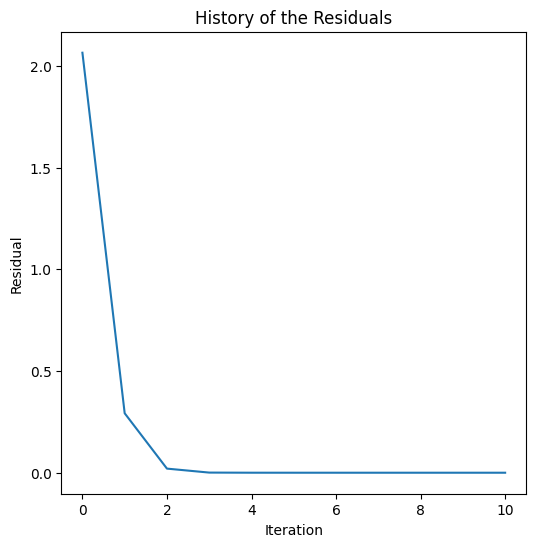

In [32]:
# Plot the history of the residuals
plt.figure(figsize=(6, 6))
plt.plot(residual_history)
plt.xlabel('Iteration')
plt.ylabel('Residual')
plt.title('History of the Residuals')
plt.show()

# III. Minimum residual scheme

### Task III.1

Implement the $\textit{minimum residual}$ scheme: an explicit non-stationary method, where at each step you select the iteration parameter $\tau_n$ to minimize the residual $\mathbf{r}_{n+1}$ given $\mathbf{r}_n$. Test it on a random matrix, study the convergence to the solution, in terms of the norm of the residual and the deviation from the ground truth solution (which you can obtain using a direct method). Study how the iteration parameter $\tau_n$ changes as iterations progress.

(50% of the grade)

#### Solucion Matematica

El objetivo del minumum residual es encontrar una solucion $x$ al sistema $Ax = b$, que minimize la norma de $r = Ax - b$. Logramos esto al iterar y actualizar nuestra estimacion de $x$ en la direccion del residuo $r$ escalado por $\tau$.

$\tau_n$ es escogido en cada $n$ para que si se da un paso en la "direccion" de $r$ the residuo resultante tenga la norma más pequeña.

Es decir encontrar $\tau$ que minimize $||r - \tau Ar||$, tomar la derivada con respecto a $\tau$ e igualarla a 0 nos da la condicion donde $\tau$ minimiza.

En este momento tenemos:
* $r$ el vector residuo actual
* $Ar$ el producto matriz - vector de $A$ y $r$

Ya que la norma es una raiz cuadrada, para solucionar tenemos $||r - \tau Ar||^2$, esto sera igual a $(r- \tau Ar) * (r- \tau Ar)$ al expandir tenemos $ (r \cdot r) - (2Ar \cdot r) + (\tau^2 Ar \cdot Ar)$, el minimo ocurre cuando su derivada respecto a $\tau$ sea 0.

Al tomar la derivada tenemos $(2 \tau Ar 	\cdot Ar) - (2 Ar 	\cdot r)$, al igual con 0 y solucionar para $\tau$ obtenemos:
$$
\tau = (Ar \cdot r)/(Ar	\cdot Ar) 
$$
 Lo que se simplifica a 
 ```
 tau = np.dot(r,Ar) / np.linalg.norm(Ar) ** 2
 ```

Ya que el cuadrado de la norma $||Ar||$ es igual a $Ar	\cdot Ar$

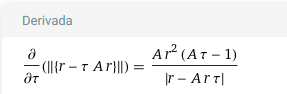

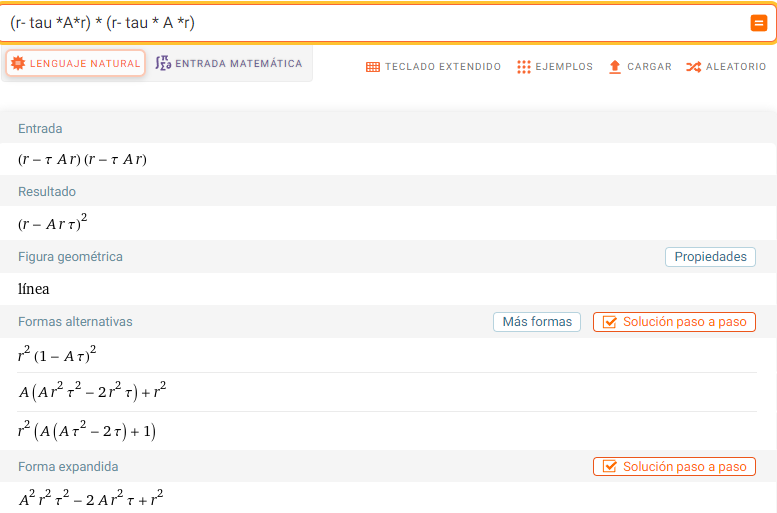

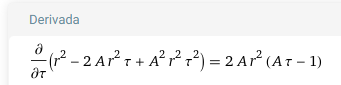

#### Codigo

In [19]:
def min_residual(A, b, tolerance=1e-10, max_iterations=10000):
    # Get the length of the vector b
    n = len(b)
    
    # Initialize the solution vector x with zeros
    x = np.zeros(n)
    
    # Initialize lists to store the history of the iteration parameter tau and the residuals
    tau_history = []
    residual_history = []

    # Iterate for a maximum number of iterations
    for _ in range(max_iterations):
        # Compute the residual r = Ax - b
        r = A @ x - b
        
        # Compute the matrix-vector product Ar = A*r
        Ar = A @ r
        
        # Compute the iteration parameter tau that minimizes the norm of the next residual
        tau = np.dot(r, Ar) / np.linalg.norm(Ar)**2
        
        # Update the solution vector x in place
        x -= tau * r
        
        # Append the current tau and the norm of the current residual to their respective histories
        tau_history.append(tau)
        residual_history.append(np.linalg.norm(r))
        
        # Check for convergence: if the norm of the residual is less than the tolerance, stop the iteration
        if np.linalg.norm(r) < tolerance:
            break
            
    # Return the final solution vector x, and the histories of tau and the residuals
    return x, tau_history, residual_history


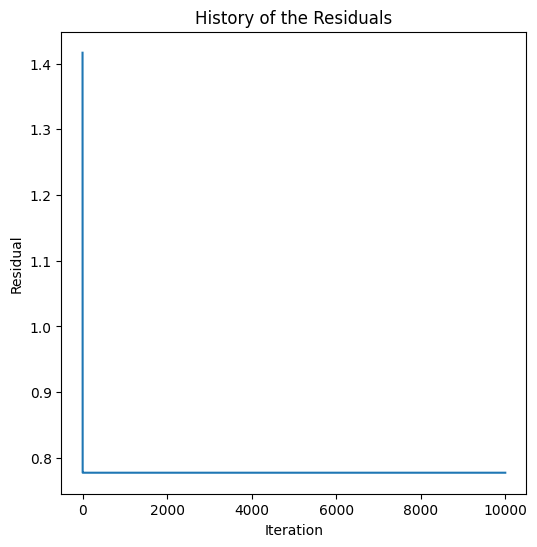

In [20]:
# Generate a random matrix and vector
n = 10
A = np.random.rand(n, n)
b = np.random.rand(n)

# Solve the system using the minimum residual method
x_minres, tau_history, residual_history = min_residual(A, b, max_iterations=10000)

# Solve the system using a direct method
x_direct = np.linalg.solve(A, b)

# Compute the history of the deviation from the ground truth solution
deviation_history = [np.linalg.norm(x_direct - x) for x in x_minres]

# Plot the history of the residuals
plt.figure(figsize=(6, 6))
plt.plot(residual_history)
plt.xlabel('Iteration')
plt.ylabel('Residual')
plt.title('History of the Residuals')
plt.show()

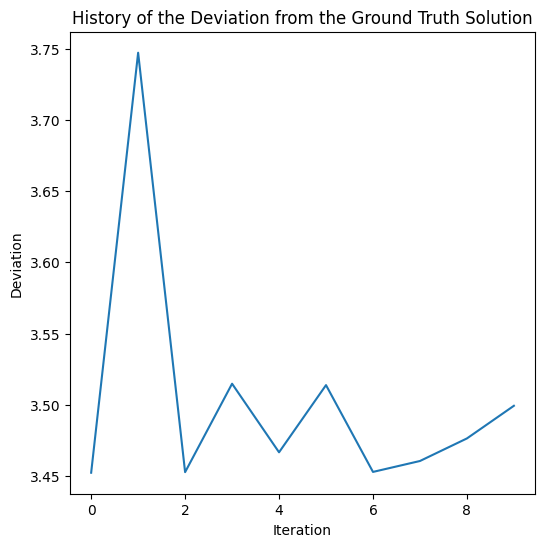

In [21]:
# Plot the history of the deviation from the ground truth solution
plt.figure(figsize=(6, 6))
plt.plot(deviation_history)
plt.xlabel('Iteration')
plt.ylabel('Deviation')
plt.title('History of the Deviation from the Ground Truth Solution')
plt.show()

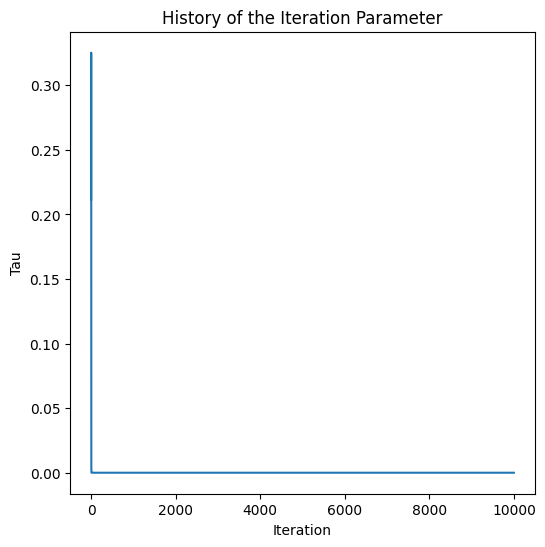

In [22]:
# Plot the history of the iteration parameter
plt.figure(figsize=(6, 6))
plt.plot(tau_history)
plt.xlabel('Iteration')
plt.ylabel('Tau')
plt.title('History of the Iteration Parameter')
plt.show()
